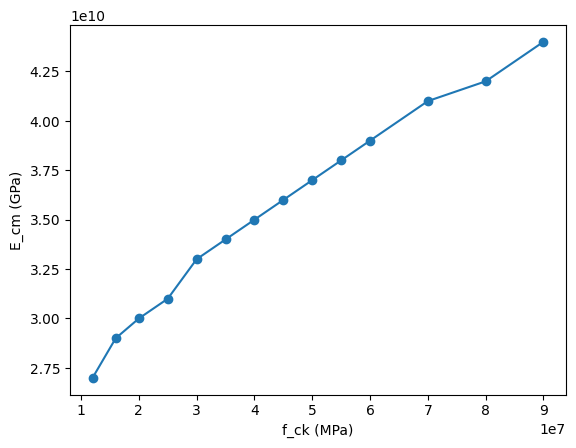

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f_ck = np.array([12,16,20,25,30,35,40,45,50,55,60,70,80,90]) * 1e6  # Pa
f_ck_cube = np.array([15,20,25,30,37,45,50,55,60,67,75,85,95,105]) * 1e6  # Pa
f_cm = np.array([20,24,28,33,38,43,48,53,58,63,68,78,88,98]) * 1e6  # Pa

f_ctm = np.array([1.6,1.9,2.2,2.6,2.9,3.2,3.5,3.8,4.1,4.2,4.4,4.6,4.8,5.0]) * 1e6  # Pa
f_ctk_005 = np.array([1.1,1.3,1.5,1.8,2.0,2.2,2.5,2.7,2.9,3.0,3.1,3.2,3.4,3.5]) * 1e6  # Pa
f_ctk_095 = np.array([2.0,2.5,2.9,3.3,3.8,4.2,4.6,4.9,5.3,5.5,5.7,6.0,6.3,6.6]) * 1e6  # Pa

E_cm = np.array([27,29,30,31,33,34,35,36,37,38,39,41,42,44]) * 1e9  # Pa

plt.plot(f_ck,E_cm,'-o')

plt.ylabel('E_cm (GPa)')
plt.xlabel('f_ck (MPa)')
plt.show()

'''
Copy to Clipboard
Concrete Design Properties according to EN1992-1-1 (γc = 1.50, fyk = 500 MPa)
Symbol	Description	C12/15	C16/20	C20/25	C25/30	C30/37	C35/45	C40/50	C45/55	C50/60	C55/67	C60/75	C70/85	C80/95	C90/105
fck (MPa)	Characteristic cylinder compressive strength	12	16	20	25	30	35	40	45	50	55	60	70	80	90
fck,cube (MPa)	Characteristic cube compressive strength	15	20	25	30	37	45	50	55	60	67	75	85	95	105
fcm (MPa)	Mean cylinder compressive strength	20	24	28	33	38	43	48	53	58	63	68	78	88	98
fctm (MPa)	Mean tensile strength	1.57	1.90	2.21	2.56	2.90	3.21	3.51	3.80	4.07	4.21	4.35	4.61	4.84	5.04
Ecm (MPa)	Elastic modulus	27085	28608	29962	31476	32837	34077	35220	36283	37278	38214	39100	40743	42244	43631
fcd (MPa)
(for αcc=1.00)	Design compressive strength
(for αcc=1.00)	8.00	10.67	13.33	16.67	20.00	23.33	26.67	30.00	33.33	36.67	40.00	46.67	53.33	60.00
fcd (MPa)
(for αcc=0.85)	Design compressive strength
(for αcc=0.85)	6.80	9.07	11.33	14.17	17.00	19.83	22.67	25.50	28.33	31.17	34.00	39.67	45.33	51.00
fctd (MPa)
(for αct=1.00)	Design tensile strength
(for αct=1.00)	0.73	0.89	1.03	1.20	1.35	1.50	1.64	1.77	1.90	1.97	2.03	2.15	2.26	2.35
ρmin (%)	Minimum longitudinal tension reinforcement ratio	0.130	0.130	0.130	0.133	0.151	0.167	0.182	0.197	0.212	0.219	0.226	0.240	0.252	0.262
ρw,min (%)	Minimum shear reinforcement ratio	0.055	0.064	0.072	0.080	0.088	0.095	0.101	0.107	0.113	0.119	0.124	0.134	0.143	0.152

'''


成功填充的颗粒数量: 311


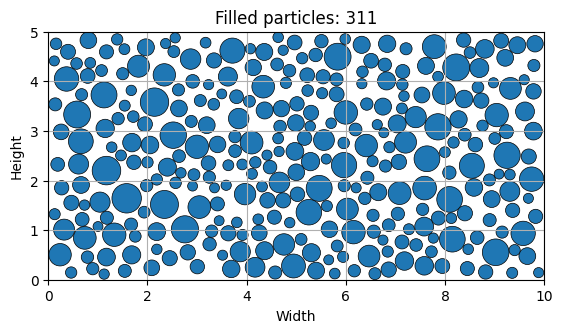

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 设置矩形区域大小
width = 10  # 矩形宽度
height = 5  # 矩形高度

# 颗粒直径范围
min_diameter = 0.2
max_diameter = 0.6

# 填充参数
max_particles = 1000       # 最大尝试填入的颗粒数
max_attempts = 10000       # 最大尝试次数（防止死循环）
particle_list = []

def generate_random_particle():
    d = np.random.uniform(min_diameter, max_diameter)
    r = d / 2
    x = np.random.uniform(r, width - r)
    y = np.random.uniform(r, height - r)
    return x, y, r

def is_overlap(x, y, r, particles):
    for px, py, pr in particles:
        dist = np.sqrt((x - px) ** 2 + (y - py) ** 2)
        if dist < r + pr:
            return True
    return False

# 粒子填充主循环
attempts = 0
while len(particle_list) < max_particles and attempts < max_attempts:
    x, y, r = generate_random_particle()
    if not is_overlap(x, y, r, particle_list):
        particle_list.append((x, y, r))
    attempts += 1

# 输出结果
print(f"成功填充的颗粒数量: {len(particle_list)}")

# 可视化
fig, ax = plt.subplots()
ax.set_aspect('equal')
for x, y, r in particle_list:
    circle = plt.Circle((x, y), r, edgecolor='k', linewidth=0.5)
    ax.add_patch(circle)

plt.xlim(0, width)
plt.ylim(0, height)
plt.title(f"Filled particles: {len(particle_list)}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)
plt.show()


成功填充的颗粒数量: 305


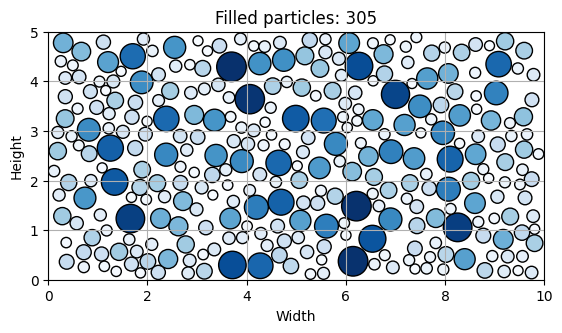

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 设置矩形区域大小
width = 10  # 矩形宽度
height = 5  # 矩形高度

# 颗粒直径范围
min_diameter = 0.2
max_diameter = 0.6

# 填充参数
max_particles = 1000       # 最大尝试填入的颗粒数
max_attempts = 10000       # 最大尝试次数（防止死循环）
particle_list = []

def generate_random_particle():
    d = np.random.uniform(min_diameter, max_diameter)
    r = d / 2
    x = np.random.uniform(r, width - r)
    y = np.random.uniform(r, height - r)
    return x, y, r

def is_overlap(x, y, r, particles):
    for px, py, pr in particles:
        dist = np.sqrt((x - px) ** 2 + (y - py) ** 2)
        if dist <= r + pr:
            return True
    return False

# 粒子填充主循环
attempts = 0
while len(particle_list) < max_particles and attempts < max_attempts:
    x, y, r = generate_random_particle()
    if not is_overlap(x, y, r, particle_list):
        particle_list.append((x, y, r))
    attempts += 1

# 输出结果
print(f"成功填充的颗粒数量: {len(particle_list)}")

# 可视化
# 设置颜色映射
cmap = plt.cm.Blues  # 使用 viridis 颜色映射，可以更换为其他颜色映射，如 plt.cm.plasma
min_radius = min_diameter / 2  # 最小半径
max_radius = max_diameter / 2  # 最大半径


fig, ax = plt.subplots()
ax.set_aspect('equal')

for x, y, r in particle_list:
    norm_radius = (r - min_radius) / (max_radius - min_radius)  # 归一化半径到 [0, 1]
    color_map = cmap(norm_radius)  # 获取颜色
    circle = plt.Circle((x, y), r, fill=True, facecolor=color_map, edgecolor='k', linewidth=1.0)
    ax.add_patch(circle)

plt.xlim(0, width)
plt.ylim(0, height)
plt.title(f"Filled particles: {len(particle_list)}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.grid(True)

plt.show()


In [11]:
df.columns

Index(['Symbol', 'Description', 'C12/15', 'C16/20', 'C20/25', 'C25/30',
       'C30/37', 'C35/45', 'C40/50', 'C45/55', 'C50/60', 'C55/67', 'C60/75',
       'C70/85', 'C80/95', 'C90/105'],
      dtype='object')

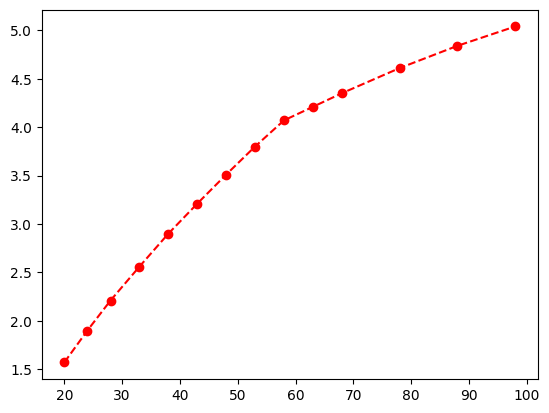

In [18]:
plt.plot(df.iloc[2, 2:],df.iloc[3, 2:], marker='o', linestyle='--', color='r')
plt.show()

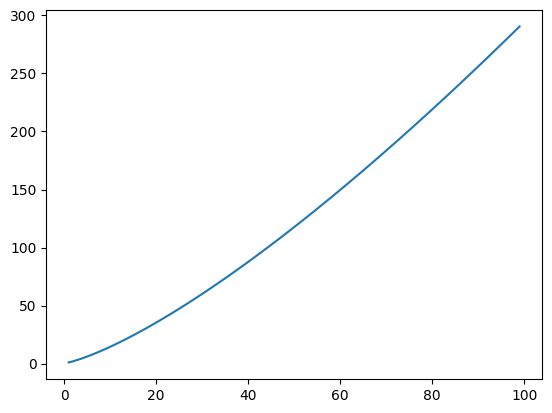

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
nature_num = np.arange(1,100,1)
sum_nature_num = (a**2 * (a+1)**2 / 4)**(1/3)
plt.plot(a,b)
plt.show()